In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df_behaviour = pd.read_csv('behaviour.csv')

In [5]:
df_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


df_behaviour.info()

In [8]:
df_behaviour.LYLTY_CARD_NBR.nunique()

72637

# on which lifestage most premium customer are?

In [11]:
df_premium = pd.get_dummies(df_behaviour.PREMIUM_CUSTOMER)

In [12]:
df_premium['lifestage'] = df_behaviour.LIFESTAGE

In [13]:
df_premium.head()

,Budget,Mainstream,Premium,lifestage
0,0,0,1,YOUNG SINGLES/COUPLES
1,0,1,0,YOUNG SINGLES/COUPLES
2,1,0,0,YOUNG FAMILIES
3,0,1,0,OLDER SINGLES/COUPLES
4,0,1,0,MIDAGE SINGLES/COUPLES


In [14]:
result = df_premium.groupby('lifestage').sum()

In [15]:
result

,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,1504.0,3340.0,2431.0
NEW FAMILIES,1112.0,849.0,588.0
OLDER FAMILIES,4675.0,2831.0,2274.0
OLDER SINGLES/COUPLES,4929.0,4930.0,4750.0
RETIREES,4454.0,6479.0,3872.0
YOUNG FAMILIES,4017.0,2728.0,2433.0
YOUNG SINGLES/COUPLES,3779.0,8088.0,2574.0


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
lifestage = df_premium.lifestage.unique()

In [40]:
lifestage= [lifestage for lifestage,df_premium in df_premium.groupby('lifestage')]
lifestage

['MIDAGE SINGLES/COUPLES',
 'NEW FAMILIES',
 'OLDER FAMILIES',
 'OLDER SINGLES/COUPLES',
 'RETIREES',
 'YOUNG FAMILIES',
 'YOUNG SINGLES/COUPLES']

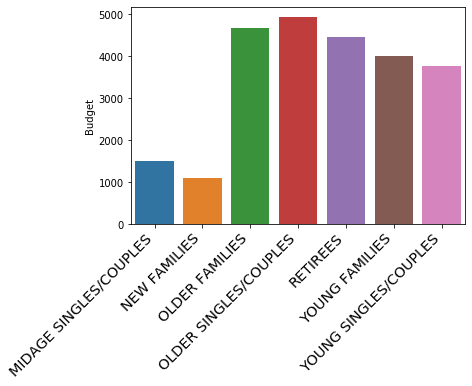

<Figure size 432x288 with 0 Axes>

In [63]:

sns.barplot(lifestage,result.Budget,orient = 'v')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()
plt.savefig('budget_count')

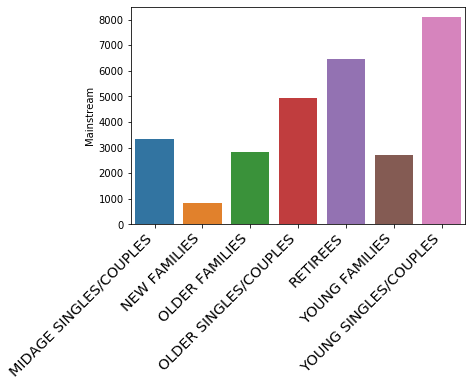

<Figure size 432x288 with 0 Axes>

In [64]:

sns.barplot(lifestage,result.Mainstream,orient = 'v')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()
plt.savefig('mainstream_count')

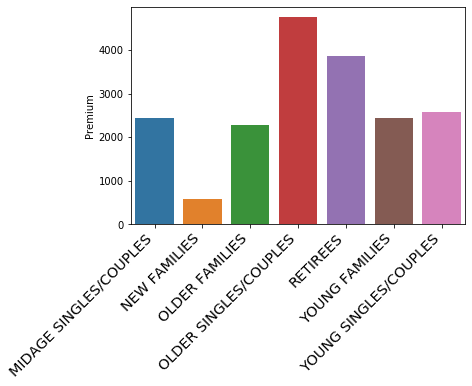

<Figure size 432x288 with 0 Axes>

In [65]:

sns.barplot(lifestage,result.Premium,orient = 'v')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()
plt.savefig('premium_count')

In [68]:
df_transcation = pd.read_excel('transaction_data.xlsx')

In [126]:
df_transcation.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [71]:
df_transcation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [74]:
df_transcation.PROD_NBR.nunique()

114

# on which day most items are sold?

In [137]:
result = df_transcation.groupby('DATE').sum().reset_index()
result

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43282,96529,96647678,96468206,42063,1394,5372.2
1,43283,93589,93701840,93577472,40201,1367,5315.4
2,43284,99862,99982192,100010549,41718,1389,5321.8
3,43285,98046,98163455,98056784,40356,1373,5309.9
4,43286,96886,96998859,96977337,42266,1358,5080.9
...,...,...,...,...,...,...,...
359,43642,97548,99081307,97353705,40455,1380,5305.0
360,43643,92804,92923154,92809584,39675,1352,5202.8
361,43644,100656,101480076,100725293,41953,1400,5299.6
362,43645,99608,102628409,99551543,40290,1438,5497.6


In [138]:
result.sort_values('TOT_SALES',inplace = True,ascending=False) 

In [139]:
result = result[['DATE','TOT_SALES']][:10]
result

,DATE,TOT_SALES
176,43458,6923.0
175,43457,6826.0
171,43453,6639.8
174,43456,6558.7
172,43454,6300.8
170,43452,6209.6
173,43455,6201.3
340,43623,5924.1
67,43349,5864.5
142,43424,5857.2


# from which store people use to buy most

In [161]:
result = df_transcation.groupby('STORE_NBR').sum().reset_index()

In [162]:
result.sort_values('TOT_SALES',ascending=False,inplace=True)

In [163]:
result = result[['STORE_NBR','TOT_SALES']][:20]
result

,STORE_NBR,TOT_SALES
225,226,18905.45
87,88,16333.25
164,165,15973.75
39,40,15559.50
236,237,15539.50
57,58,15251.45
198,199,14797.00
3,4,14647.65
202,203,14551.60
25,26,14469.30


# top 10 loyality car number who buys most?

In [152]:
result = df_transcation.groupby('LYLTY_CARD_NBR').sum().reset_index()
result

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1000,43390,1,1,5,2,6.0
1,1002,43359,1,2,58,1,2.7
2,1003,87063,2,7,158,2,6.6
3,1004,43406,1,5,96,1,1.9
4,1005,43462,1,6,86,1,2.8
...,...,...,...,...,...,...,...
72632,2370651,43315,88,240350,4,2,13.0
72633,2370701,43442,88,240378,24,2,7.2
72634,2370751,43374,88,240394,60,2,9.2
72635,2370961,86797,176,480961,135,4,18.6


In [153]:
result.sort_values('TOT_SALES',inplace=True,ascending=False)

In [157]:
result = result[['LYLTY_CARD_NBR','TOT_SALES']][:10]
result

,LYLTY_CARD_NBR,TOT_SALES
59694,226000,1300.00
60925,230078,138.60
17292,63197,132.80
69017,259009,127.20
42813,162039,126.80
16001,58361,124.80
61001,230154,124.40
25958,94185,122.80
35338,130090,122.65
47959,179228,120.80


# which product people use to buy most

In [178]:
result = df_transcation.groupby('PROD_NAME').sum().reset_index()


In [179]:
result.sort_values('TOT_SALES',inplace = True,ascending=False)
result

,PROD_NAME,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
11,Dorito Corn Chp Supreme 380g,138432461,439896,443492797,440171620,12740,6509,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,140511990,430947,433754145,431316957,45262,6164,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,138957063,429523,433054613,429685816,51152,6106,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,143600840,454974,460214668,457711562,337008,6381,34457.4
76,Smiths Crinkle Original 330g,136576793,424303,424842310,424601150,21994,6018,34302.6
...,...,...,...,...,...,...,...,...
104,WW Crinkle Cut Chicken 175g,63767555,197656,197875779,197744176,134964,2766,4702.2
90,Sunbites Whlegrn Crisps Frch/Onin 90g,62236303,196264,198733299,196535546,136040,2706,4600.2
105,WW Crinkle Cut Original 175g,61281058,193110,193319713,193112357,101520,2666,4532.2
113,Woolworths Mild Salsa 300g,64810366,198450,198735929,198535095,52185,2823,4234.5


In [180]:
result[['PROD_NAME','TOT_SALES','PROD_QTY']][:20]

,PROD_NAME,TOT_SALES,PROD_QTY
11,Dorito Corn Chp Supreme 380g,40352.0,6509
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6,6164
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2,6106
33,Kettle Mozzarella Basil & Pesto 175g,34457.4,6381
76,Smiths Crinkle Original 330g,34302.6,6018
6,Cheezels Cheese 330g,34296.9,6017
12,Doritos Cheese Supreme 330g,33390.6,5858
39,Kettle Sweet Chilli And Sour Cream 175g,33031.8,6120
34,Kettle Original 175g,32740.2,6064
35,Kettle Sea Salt And Vinegar 175g,32589.0,6035


# WHICH TO PRODUCT SOLD TOGETHER

In [165]:
df = df_transcation[df_transcation.TXN_ID.duplicated(keep = False)]

In [169]:
df['grouped'] = df.groupby('TXN_ID')['PROD_NAME'].transform(lambda x: ','.join(x))
df = df[['TXN_ID','grouped']].drop_duplicates()
df.head()

,TXN_ID,grouped
41,48887,"Dorito Corn Chp Supreme 380g,Twisties Chic..."
376,7739,"Tostitos Lightly Salted 175g,Doritos Cheese..."
418,10982,"Tostitos Lightly Salted 175g,Doritos Corn C..."
475,14546,"Pringles Sthrn FriedChicken 134g,Pringles Orig..."
510,16683,"Smiths Crinkle Original 330g,Infzns Crn C..."


In [170]:
from itertools import combinations

In [173]:
from collectionsmport Counter

In [181]:
count = Counter()
for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('Doritos Corn Chips  Original 170g',
   'Old El Paso Salsa   Dip Chnky Tom Ht300g'),
  4),
 (('WW Sour Cream &OnionStacked Chips 160g',
   'Infuzions Mango     Chutny Papadums 70g'),
  3),
 (('Natural Chip Co     Tmato Hrb&Spce 175g',
   'Pringles Sthrn FriedChicken 134g'),
  3),
 (('Infuzions Thai SweetChili PotatoMix 110g',
   'Kettle Sensations   BBQ&Maple 150g'),
  3),
 (('Kettle Chilli 175g', 'Doritos Mexicana    170g'), 3),
 (('Smiths Crinkle Cut  Chips Chicken 170g',
   'Red Rock Deli SR    Salsa & Mzzrlla 150g'),
  3),
 (('Kettle Sensations   Camembert & Fig 150g', 'Pringles Barbeque   134g'), 3),
 (('Pringles Sthrn FriedChicken 134g', 'Thins Potato Chips  Hot & Spicy 175g'),
  3),
 (('Infuzions SourCream&Herbs Veg Strws 110g',
   'Kettle Sweet Chilli And Sour Cream 175g'),
  3),
 (('Pringles Original   Crisps 134g', 'Doritos Corn Chips  Nacho Cheese 170g'),
  3)]

In [210]:
df_updated = df_behaviour.merge(df_transcation,on = 'LYLTY_CARD_NBR')

In [211]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [212]:
df_updated.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [213]:
df_updated.describe(include = 'object')

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME
count,264836,264836,264836
unique,7,3,114
top,OLDER SINGLES/COUPLES,Mainstream,Kettle Mozzarella Basil & Pesto 175g
freq,54479,101988,3304


In [214]:
df_updated.LIFESTAGE.value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

# WHICH PRODUCT SOLD MAXIMUM AMONG OLDER SINGLES/COUPLES AND AMONG RETIREES

In [215]:
k = pd.get_dummies(df_updated['LIFESTAGE'],drop_first=True)

In [216]:
k= k[['OLDER SINGLES/COUPLES','RETIREES']]

In [217]:
df_updated = pd.concat([k,df_updated],axis = 1)

In [218]:
df_updated.head()

,OLDER SINGLES/COUPLES,RETIREES,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,0,0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,0,0,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,0,0,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,0,0,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1,0,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [224]:
result  = df_updated.groupby('PROD_NAME').sum().reset_index()
result.head()

,PROD_NAME,OLDER SINGLES/COUPLES,RETIREES,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,Burger Rings 220g,292.0,256.0,213917679,67981066,211365,211659544,147016,2970,6831.0
1,CCs Nacho Cheese 175g,243.0,225.0,197051283,65108752,196830,196699043,98868,2839,5961.9
2,CCs Original 175g,295.0,275.0,206366755,65803568,206075,206359269,81756,2880,6048.0
3,CCs Tasty Cheese 175g,313.0,241.0,210480069,66895627,210177,210359656,140049,2890,6069.0
4,Cheetos Chs & Bacon Balls 190g,318.0,226.0,194431594,64273738,194220,193979011,26622,2801,9243.3


In [225]:
result.sort_values('RETIREES',ascending=False,inplace=True)

In [226]:
result.head()

,PROD_NAME,OLDER SINGLES/COUPLES,RETIREES,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
92,Thins Chips Light& Tangy 175g,664.0,670.0,439492152,138553408,438811,439289912,140272,6095,20113.5
33,Kettle Mozzarella Basil & Pesto 175g,665.0,669.0,460214668,143600840,454974,457711562,337008,6381,34457.4
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,691.0,669.0,450720581,143252563,450165,450534492,355968,6309,29021.4
51,Pringles Barbeque 134g,672.0,667.0,437342613,139517839,436802,437134945,349890,6112,22614.4
100,Twisties Cheese Burger 250g,668.0,665.0,431813427,137729825,429021,429511761,224999,6069,26096.7


In [227]:
result.sort_values('OLDER SINGLES/COUPLES',ascending=False,inplace=True)

In [228]:
result.head()

,PROD_NAME,OLDER SINGLES/COUPLES,RETIREES,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
30,Kettle 135g Swt Pot Sea Salt,740.0,630.0,444948871,141569797,442136,442524266,205191,6212,26090.4
8,Cobs Popd Sea Salt Chips 110g,727.0,648.0,440229344,141912763,439669,440060386,244875,6277,23852.6
94,Thins Chips Seasonedchicken 175g,719.0,605.0,415521450,135342819,414914,415000249,124560,5986,19753.8
98,Tostitos Splash Of Lime 175g,715.0,602.0,442874229,141339410,442252,442588546,240648,6234,27429.6
14,Doritos Corn Chip Southern Chicken 150g,712.0,613.0,424528072,137854140,421625,421888965,294996,6086,23735.4


# WHICH PRODUCT SOLD MOST AMONG MAINSTREAM CUSTOMER

In [231]:
k = pd.get_dummies(df_updated.PREMIUM_CUSTOMER, drop_first=True)

In [233]:
k.drop('Premium',axis = 1,inplace = True)

In [234]:
df_updated =  pd.concat([k,df_updated],axis = 1)

In [236]:
result = df_updated.groupby('PROD_NAME').sum().reset_index()

In [242]:
result.sort_values(['Mainstream','OLDER SINGLES/COUPLES'],inplace = True,ascending=False)

In [243]:
result.head()

,PROD_NAME,Mainstream,OLDER SINGLES/COUPLES,RETIREES,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,1360.0,691.0,669.0,450720581,143252563,450165,450534492,355968,6309,29021.4
102,Tyrrells Crisps Ched & Chives 165g,1324.0,694.0,651.0,437838624,142039765,437279,437325878,366016,6227,26149.2
30,Kettle 135g Swt Pot Sea Salt,1316.0,740.0,630.0,444948871,141569797,442136,442524266,205191,6212,26090.4
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,1313.0,663.0,650.0,442890782,142087836,441611,441547394,107877,6256,23772.8
86,Smiths Crnkle Chip Orgnl Big Bag 380g,1309.0,672.0,622.0,433754145,140511990,430947,431316957,45262,6164,36367.6
